### Import Modules

In [8]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Choice

In [12]:
outcomes = np.random.choice(two_groups, 10)
outcomes

array(['control', 'control', 'control', 'control', 'treatment',
       'treatment', 'control', 'treatment', 'control', 'control'],
      dtype='<U9')

In [14]:
outcomes == 'control'

array([ True,  True,  True,  True, False, False,  True, False,  True,
        True])

In [16]:
sum(outcomes == 'control')

7

In [17]:
sum(outcomes == 'treatment')

3

In [18]:
np.count_nonzero(outcomes == 'treatment')

3

### Simulation of Rolling Fair die

In [19]:
# Roll two die 1000 times (Sum of two RVs. Don't multiple by 2) 
outcomes = np.random.choice(np.arange(7), 1000) + np.random.choice(np.arange(7), 1000)
Table().with_column("Outcome", outcomes).group(0).show()

Outcome,count
2,28
3,53
4,79
5,121
6,146
7,183
8,143
9,103
10,76
11,53


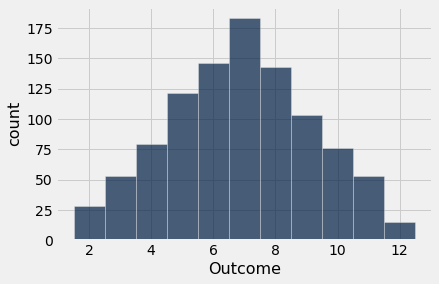

In [20]:
Table().with_column("Outcome", outcomes).group(0).bar('Outcome')   # Normally distributed.

In [21]:
outcomes2 = 2 * np.random.choice(np.arange(1, 7), 1000)       # A different distribution than the one above!
Table().with_column('Outcome', outcomes2).group(0)       

Outcome,count
2,173
4,162
6,159
8,161
10,183
12,162


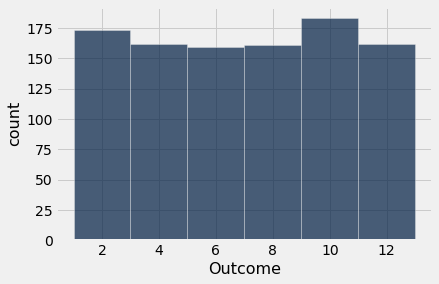

In [22]:
Table().with_column("Outcome", outcomes2).group(0).bar('Outcome')    # Aproximately Uniformly distributed

## Simulation of Flipping a Fair Coin 100 Times

In [28]:
coin = make_array('heads', 'tails')
np.random.choice(coin)

'heads'

In [29]:
sum(np.random.choice(coin, 600) == 'heads')

318

In [30]:
num_heads = make_array(sum(np.random.choice(coin, 100) == 'heads'))
num_heads

array([47])

In [31]:
num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'heads'))
num_heads

array([47, 57])

In [32]:
num_heads = []
for i in np.arange(10000):
    num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'heads'))
len(num_heads)

10000

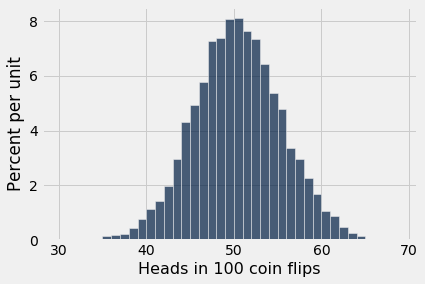

In [33]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

In [34]:
t

Heads in 100 coin flips
50
60
53
63
49
39
43
57
53
50


In [47]:
most = t.group(0).where(0, are.between(40, 60))
most

Heads in 100 coin flips,count
40,96
41,139
42,210
43,316
44,383
45,508
46,602
47,660
48,748
49,771


In [49]:
sum(most.column('count')) / t.num_rows * 100    # 95% of the number of heads in 100 coin flips is between 40 and 60. 

95.27

### Using Z-Scores and Normal Distribution 

In [43]:
# Of flipping the coin 100 times, assume the average of getting a head is 50
x_bar = np.average(t.column('Heads in 100 coin flips'))
# Standard deviation
n = len(t.column('Heads in 100 coin flips'))
variance = sum([((x - x_bar) ** 2) for x in t.column('Heads in 100 coin flips')]) / n
s = variance ** 0.5
print(s)
# We could also use np.std()
np.std(t.column('Heads in 100 coin flips'))

5.005966643916175


5.005966643916038

In [37]:
x_bar

49.9286

In [40]:
# Z Scores
Z1 = (40 - x_bar) / s
Z2 = (60 - x_bar) / s
Z1, Z2

(-1.9833532075301332, 2.011879166682007)

In [44]:
# P(40 < X < 60) = P(X < 60) - P(X < 40) = P(Z < Z1) - P(Z < Z2) 
import scipy.stats as st
round((st.norm.cdf(Z2) - st.norm.cdf(Z1)) * 100, 2)

95.42